In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn import preprocessing

In [6]:
data = pd.read_csv("C:\\Users\\Varnika Mulay\\Downloads\\datasets\\seattle-weather.csv")
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain
5,06-01-2012,2.5,4.4,2.2,2.2,rain
6,07-01-2012,0.0,7.2,2.8,2.3,rain
7,08-01-2012,0.0,10.0,2.8,2.0,sun
8,09-01-2012,4.3,9.4,5.0,3.4,rain
9,10-01-2012,1.0,6.1,0.6,3.4,rain


In [7]:
data.tail(10)

,date,precipitation,temp_max,temp_min,wind,weather
1451,22-12-2015,4.6,7.8,2.8,5.0,rain
1452,23-12-2015,6.1,5.0,2.8,7.6,rain
1453,24-12-2015,2.5,5.6,2.2,4.3,rain
1454,25-12-2015,5.8,5.0,2.2,1.5,rain
1455,26-12-2015,0.0,4.4,0.0,2.5,sun
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun
1460,31-12-2015,0.0,5.6,-2.1,3.5,sun


In [8]:
data.info

<bound method DataFrame.info of             date  precipitation  temp_max  temp_min  wind  weather
0     01-01-2012            0.0      12.8       5.0   4.7  drizzle
1     02-01-2012           10.9      10.6       2.8   4.5     rain
2     03-01-2012            0.8      11.7       7.2   2.3     rain
3     04-01-2012           20.3      12.2       5.6   4.7     rain
4     05-01-2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  27-12-2015            8.6       4.4       1.7   2.9     rain
1457  28-12-2015            1.5       5.0       1.7   1.3     rain
1458  29-12-2015            0.0       7.2       0.6   2.6      fog
1459  30-12-2015            0.0       5.6      -1.0   3.4      sun
1460  31-12-2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [9]:
#Finding the missing values in each column
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [10]:
data['weather'].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [11]:
drizzle_data = data.loc[data['weather'] == 'drizzle']
drizzle_data

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
26,27-01-2012,0.0,6.7,-2.2,1.4,drizzle
45,15-02-2012,0.0,7.2,0.6,1.8,drizzle
85,26-03-2012,0.0,12.8,6.1,4.3,drizzle
103,13-04-2012,0.0,15.0,3.9,4.0,drizzle
118,28-04-2012,0.0,16.1,8.3,2.5,drizzle
135,15-05-2012,0.0,24.4,9.4,4.1,drizzle
175,24-06-2012,0.0,19.4,9.4,2.0,drizzle
186,05-07-2012,0.0,24.4,10.6,3.1,drizzle
191,10-07-2012,0.0,23.9,11.1,2.3,drizzle


In [12]:
rain_data = data.loc[data['weather'] == 'rain']
rain_data

,date,precipitation,temp_max,temp_min,wind,weather
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain
5,06-01-2012,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...,...
1452,23-12-2015,6.1,5.0,2.8,7.6,rain
1453,24-12-2015,2.5,5.6,2.2,4.3,rain
1454,25-12-2015,5.8,5.0,2.2,1.5,rain
1456,27-12-2015,8.6,4.4,1.7,2.9,rain


In [13]:
sun_data = data.loc[data['weather'] == 'sun']
sun_data

,date,precipitation,temp_max,temp_min,wind,weather
7,08-01-2012,0.0,10.0,2.8,2.0,sun
10,11-01-2012,0.0,6.1,-1.1,5.1,sun
11,12-01-2012,0.0,6.1,-1.7,1.9,sun
12,13-01-2012,0.0,5.0,-2.8,1.3,sun
32,02-02-2012,0.0,8.3,1.7,2.6,sun
...,...,...,...,...,...,...
1427,28-11-2015,0.0,7.2,-2.7,1.0,sun
1443,14-12-2015,0.0,7.8,1.7,1.7,sun
1455,26-12-2015,0.0,4.4,0.0,2.5,sun
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun


In [14]:
snow_data = data.loc[data['weather'] == 'snow']
snow_data

,date,precipitation,temp_max,temp_min,wind,weather
13,14-01-2012,4.1,4.4,0.6,5.3,snow
14,15-01-2012,5.3,1.1,-3.3,3.2,snow
15,16-01-2012,2.5,1.7,-2.8,5.0,snow
16,17-01-2012,8.1,3.3,0.0,5.6,snow
17,18-01-2012,19.8,0.0,-2.8,5.0,snow
18,19-01-2012,15.2,-1.1,-2.8,1.6,snow
19,20-01-2012,13.5,7.2,-1.1,2.3,snow
56,26-02-2012,1.3,5.0,-1.1,3.4,snow
58,28-02-2012,3.6,6.7,-0.6,4.2,snow
59,29-02-2012,0.8,5.0,1.1,7.0,snow


In [15]:
fog_data = data.loc[data['weather'] == 'fog']
fog_data

,date,precipitation,temp_max,temp_min,wind,weather
192,11-07-2012,0.0,27.8,13.3,2.9,fog
260,17-09-2012,0.0,27.8,11.7,2.2,fog
266,23-09-2012,0.0,19.4,10.0,1.4,fog
267,24-09-2012,0.0,21.1,10.0,1.8,fog
330,26-11-2012,0.0,9.4,1.7,3.8,fog
...,...,...,...,...,...,...
1419,20-11-2015,0.0,8.3,0.6,4.0,fog
1421,22-11-2015,0.0,10.0,1.7,3.1,fog
1428,29-11-2015,0.0,1.7,-2.1,0.9,fog
1448,19-12-2015,0.0,8.3,2.8,4.1,fog


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257E88B4700>,
      dtype=object)

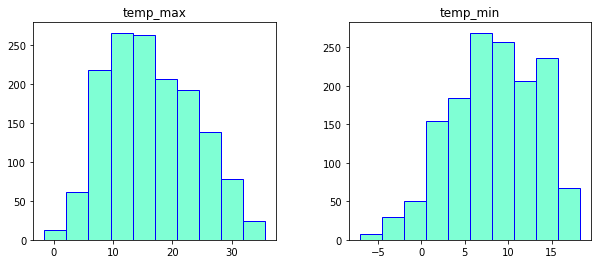

In [16]:
# illustrate histogram
conditions = ['temp_max', 'temp_min']
data[conditions].hist(figsize=(10, 4), color = 'aquamarine', edgecolor = 'blue', grid = False)

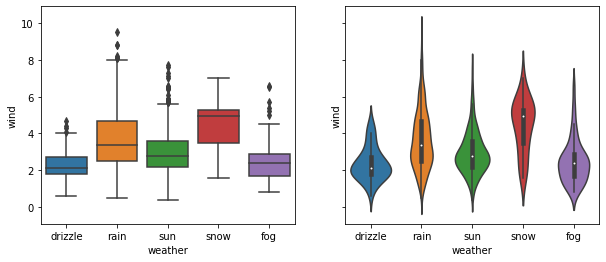

In [17]:
# Box plot and violin plot for Outcome vs BloodPressure
_, axes = pl.subplots(1, 2, sharey=True, figsize=(10, 4))
 
# box plot illustration
sns.boxplot(x='weather', y='wind', data=data, ax=axes[0])
 
# violin plot illustration
sns.violinplot(x='weather', y='wind', data=data, ax=axes[1])

In [18]:
year_data=[]
for i in range(len(data)):
  new_Date = data.date[i][6:10]
  year_data.append(new_Date)
year_data

['2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 '2012',
 

In [19]:
date_values=[]
for i in range(len(data)):
  new_Date = data.date[i][0:2]
  date_values.append(new_Date)
date_values

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',

In [20]:
month_values=[]
for i in range(len(data)):
  new_Date = data.date[i][3:5]
  month_values.append(new_Date)
month_values

['01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '01',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '02',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '04',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',
 '05',

Text(0, 0.5, 'Precipitation')

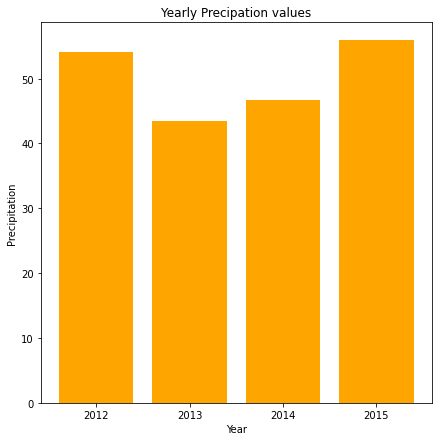

In [21]:
pl.figure(figsize = (7,7))
pl.title("Yearly Precipation values")
pl.bar(year_data, data['precipitation'], color = 'orange')
pl.xlabel("Year")
pl.ylabel("Precipitation")

Text(0.5, 1.0, 'Co-relation between weather')

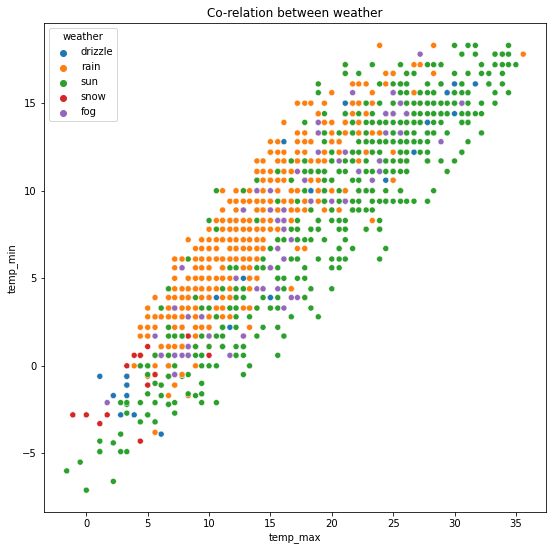

In [22]:
pl.figure(figsize=(9,9))
sns.scatterplot(x='temp_max', y ='temp_min' ,
data = data , hue = 'weather')
pl.title("Co-relation between weather")

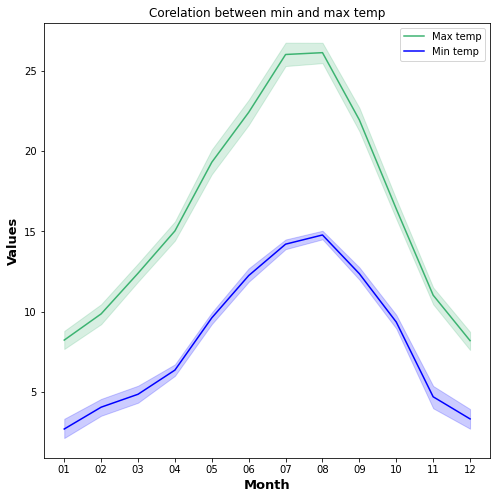

In [23]:
pl.figure(figsize = (8,8))
#sns.lineplot(x = list1, y = 'wind', data = data)
#sns.lineplot(x = list1, y = 'precipitation', data = data)
sns.lineplot(x = month_values, y = 'temp_max', data = data, label = 'Max temp', color = 'mediumseagreen')
sns.lineplot(x = month_values, y = 'temp_min', data = data, label = 'Min temp', color = 'blue')
pl.xlabel("Month",fontweight='bold',size=13)
pl.ylabel("Values",fontweight='bold',size=13)
pl.title('Corelation between min and max temp')
pl.legend()
pl.show()

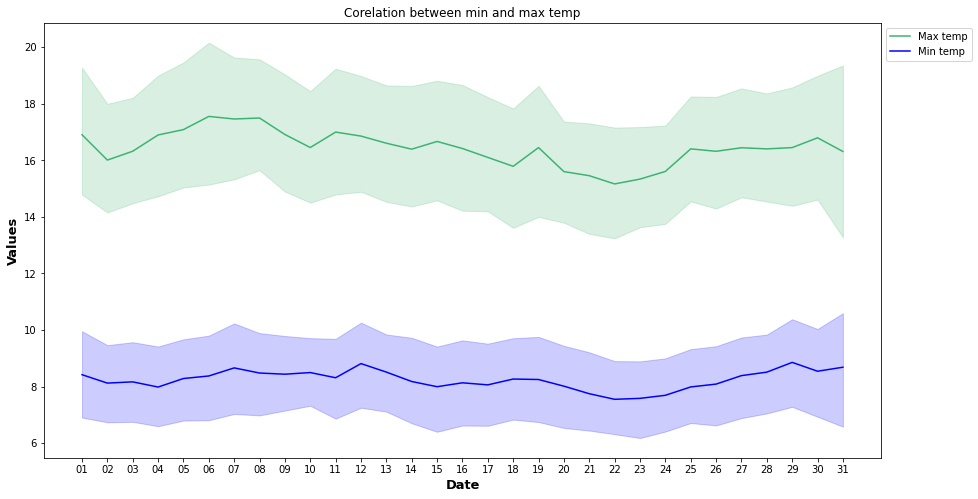

In [24]:
pl.figure(figsize = (15,8))
#sns.lineplot(x = list1, y = 'wind', data = data)
#sns.lineplot(x = list1, y = 'precipitation', data = data)
sns.lineplot(x = date_values, y = 'temp_max', data = data, label = 'Max temp', color = 'mediumseagreen')
sns.lineplot(x = date_values, y = 'temp_min', data = data, label = 'Min temp', color = 'blue')
pl.xlabel("Date",fontweight='bold',size=13)
pl.ylabel("Values",fontweight='bold',size=13)
pl.title('Corelation between min and max temp')
pl.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
pl.show()

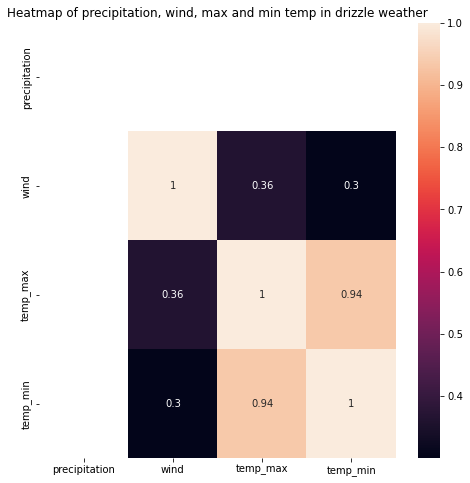

In [25]:
corr = drizzle_data[['precipitation', 'wind', 'temp_max', 'temp_min']].corr()
pl.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
pl.title('Heatmap of precipitation, wind, max and min temp in drizzle weather')
pl.show()

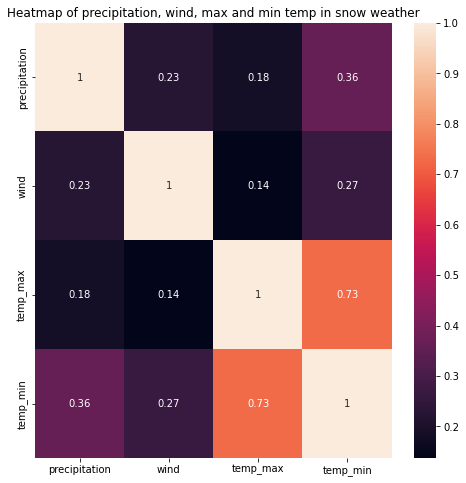

In [26]:
corr = snow_data[['precipitation', 'wind', 'temp_max', 'temp_min']].corr()
pl.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
pl.title('Heatmap of precipitation, wind, max and min temp in snow weather')
pl.show()

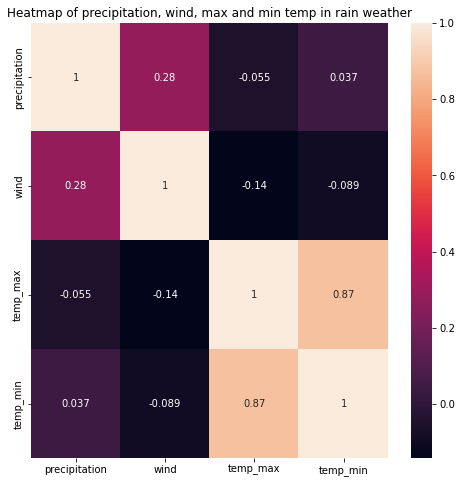

In [27]:
corr = rain_data[['precipitation', 'wind', 'temp_max', 'temp_min']].corr()
pl.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
pl.title('Heatmap of precipitation, wind, max and min temp in rain weather')
pl.show()

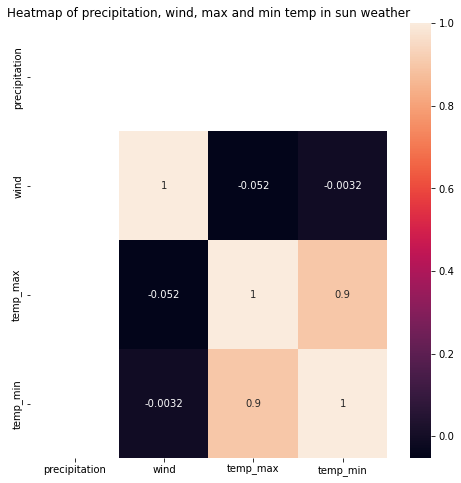

In [28]:
corr = sun_data[['precipitation', 'wind', 'temp_max', 'temp_min']].corr()
pl.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
pl.title('Heatmap of precipitation, wind, max and min temp in sun weather')
pl.show()

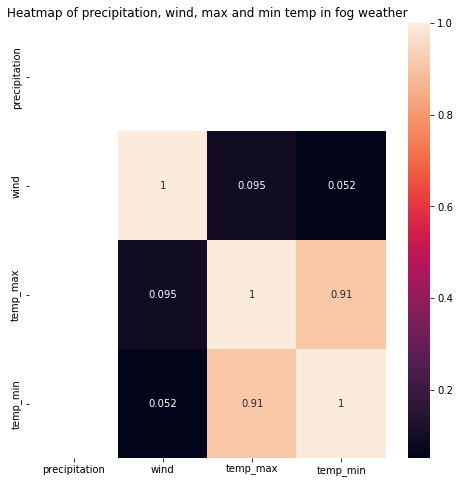

In [29]:
corr = fog_data[['precipitation', 'wind', 'temp_max', 'temp_min']].corr()
pl.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
pl.title('Heatmap of precipitation, wind, max and min temp in fog weather')
pl.show()

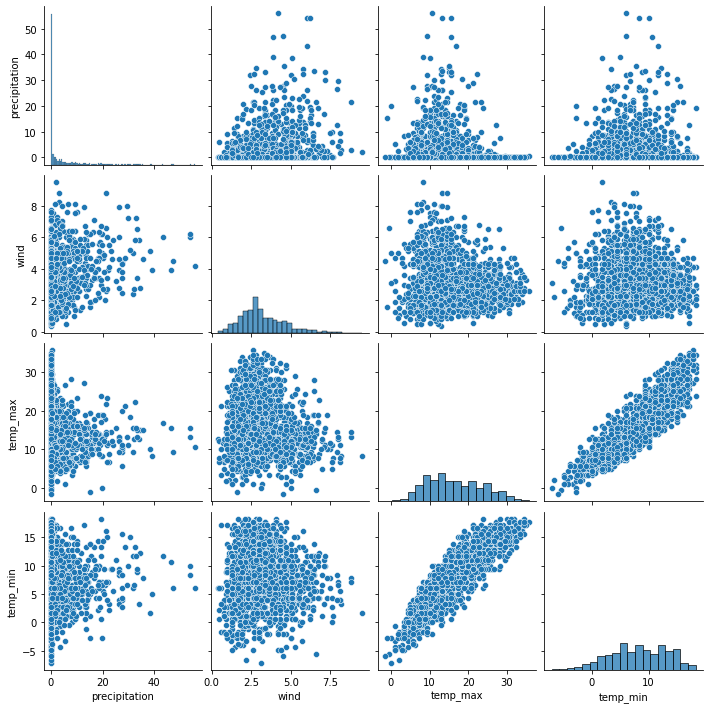

In [30]:
pair_data = data[['precipitation', 'wind', 'temp_max', 'temp_min',]]
sns.pairplot(pair_data)
pl.show()

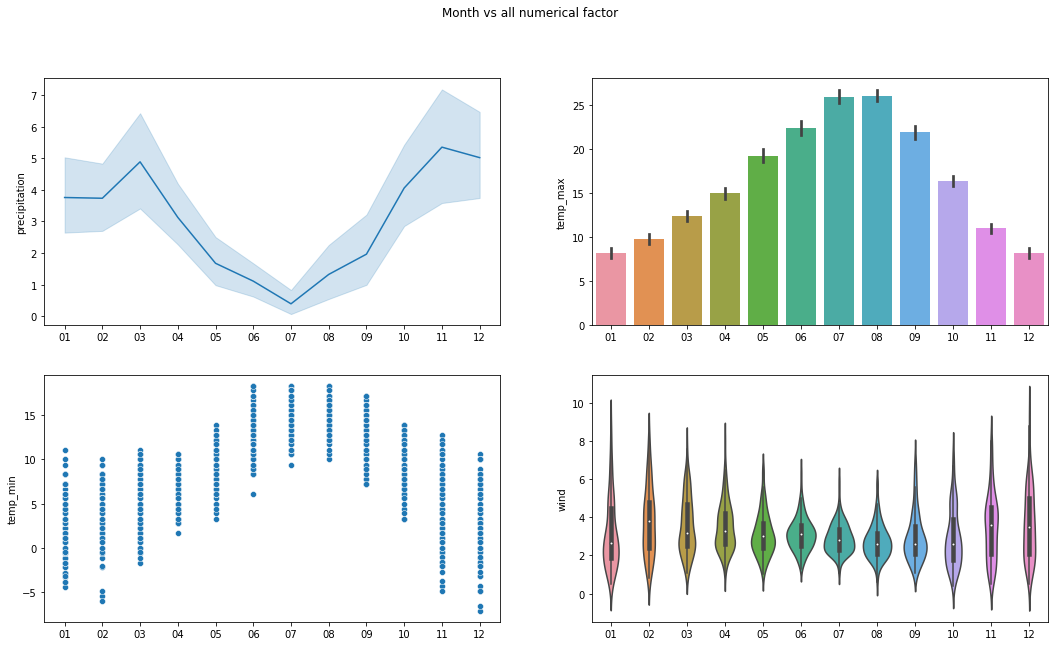

In [31]:
fig, axes = pl.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Month vs all numerical factor')
sns.lineplot(ax=axes[0, 0], data=data, x= month_values, y='precipitation')
sns.barplot(ax=axes[0, 1], data=data, x= month_values, y='temp_max')
sns.scatterplot(ax=axes[1, 0], data=data, x= month_values, y='temp_min')
sns.violinplot(ax=axes[1, 1], data=data, x= month_values, y='wind')
pl.show()

In [32]:
data.insert(6, "Year", year_data)
data.insert(7, "Month", month_values)
data.insert(8, "Day", date_values)
data

,date,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle,2012,01,01
1,02-01-2012,10.9,10.6,2.8,4.5,rain,2012,01,02
2,03-01-2012,0.8,11.7,7.2,2.3,rain,2012,01,03
3,04-01-2012,20.3,12.2,5.6,4.7,rain,2012,01,04
4,05-01-2012,1.3,8.9,2.8,6.1,rain,2012,01,05
...,...,...,...,...,...,...,...,...,...
1456,27-12-2015,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,28-12-2015,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,29-12-2015,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [33]:
from sklearn.preprocessing import LabelEncoder
#After applying Label Encoding with LabelEncoder() our categorical value will replace with the numerical value[int].
le = LabelEncoder()
data['weather_values'] = le.fit_transform(data['weather'])
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,Year,Month,Day,weather_values
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle,2012,01,01,0
1,02-01-2012,10.9,10.6,2.8,4.5,rain,2012,01,02,2
2,03-01-2012,0.8,11.7,7.2,2.3,rain,2012,01,03,2
3,04-01-2012,20.3,12.2,5.6,4.7,rain,2012,01,04,2
4,05-01-2012,1.3,8.9,2.8,6.1,rain,2012,01,05,2
5,06-01-2012,2.5,4.4,2.2,2.2,rain,2012,01,06,2
6,07-01-2012,0.0,7.2,2.8,2.3,rain,2012,01,07,2
7,08-01-2012,0.0,10.0,2.8,2.0,sun,2012,01,08,4
8,09-01-2012,4.3,9.4,5.0,3.4,rain,2012,01,09,2
9,10-01-2012,1.0,6.1,0.6,3.4,rain,2012,01,10,2


In [34]:
#Store labels and name for final use
weather_dict = dict(zip(data['weather_values'], data['weather']))
weather_dict

{0: 'drizzle', 2: 'rain', 4: 'sun', 3: 'snow', 1: 'fog'}

In [35]:
data['weather_values']

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather_values, Length: 1461, dtype: int32

In [36]:
data.describe()

,precipitation,temp_max,temp_min,wind,weather_values
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2.752225
std,6.680194,7.349758,5.023004,1.437825,1.191380
min,0.000000,-1.600000,-7.100000,0.400000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,2.000000
50%,0.000000,15.600000,8.300000,3.000000,2.000000
75%,2.800000,22.200000,12.200000,4.000000,4.000000
max,55.900000,35.600000,18.300000,9.500000,4.000000


In [37]:
data = data.drop(['weather'], axis=1)

In [51]:
data = data.drop(['date'], axis = 1)
data

,precipitation,temp_max,temp_min,wind,Year,Month,Day,weather_values
0,0.0,12.8,5.0,4.7,2012,01,01,0
1,10.9,10.6,2.8,4.5,2012,01,02,2
2,0.8,11.7,7.2,2.3,2012,01,03,2
3,20.3,12.2,5.6,4.7,2012,01,04,2
4,1.3,8.9,2.8,6.1,2012,01,05,2
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27,2
1457,1.5,5.0,1.7,1.3,2015,12,28,2
1458,0.0,7.2,0.6,2.6,2015,12,29,1
1459,0.0,5.6,-1.0,3.4,2015,12,30,4


In [52]:
#Identifying target variable
Y = data[['weather_values']]
X = data.drop(columns=['weather_values'])

In [53]:
X

,precipitation,temp_max,temp_min,wind,Year,Month,Day
0,0.0,12.8,5.0,4.7,2012,01,01
1,10.9,10.6,2.8,4.5,2012,01,02
2,0.8,11.7,7.2,2.3,2012,01,03
3,20.3,12.2,5.6,4.7,2012,01,04
4,1.3,8.9,2.8,6.1,2012,01,05
...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,2015,12,27
1457,1.5,5.0,1.7,1.3,2015,12,28
1458,0.0,7.2,0.6,2.6,2015,12,29
1459,0.0,5.6,-1.0,3.4,2015,12,30


In [54]:
Y

,weather_values
0,0
1,2
2,2
3,2
4,2
...,...
1456,2
1457,2
1458,1
1459,4


In [55]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [56]:
len(x_train),len(x_test),len(y_train),len(y_test)

(1095, 366, 1095, 366)

In [57]:
x_train

,precipitation,temp_max,temp_min,wind,Year,Month,Day
810,0.0,10.6,2.8,3.8,2014,03,21
1384,0.0,20.0,8.9,1.3,2015,10,16
626,0.0,21.1,13.3,2.5,2013,09,18
813,0.0,18.9,2.8,2.2,2014,03,24
839,13.7,11.7,5.6,4.7,2014,04,19
...,...,...,...,...,...,...,...
1130,8.4,10.6,4.4,1.7,2015,02,04
1294,0.0,33.3,17.8,3.4,2015,07,18
860,0.5,15.6,7.2,2.1,2014,05,10
1459,0.0,5.6,-1.0,3.4,2015,12,30


In [58]:
x_test

,precipitation,temp_max,temp_min,wind,Year,Month,Day
892,0.0,23.9,11.1,2.7,2014,06,11
1105,5.8,7.8,6.1,0.5,2015,01,10
413,0.0,9.4,4.4,3.4,2013,02,17
522,0.0,26.7,12.2,2.5,2013,06,06
1036,1.8,13.3,7.2,2.9,2014,11,02
...,...,...,...,...,...,...,...
243,0.0,22.2,10.6,2.9,2012,08,31
1342,0.0,18.3,10.0,2.9,2015,09,04
1057,11.9,12.8,5.6,5.1,2014,11,23
1418,2.0,8.9,2.8,4.2,2015,11,19


In [59]:
y_train

,weather_values
810,4
1384,4
626,4
813,4
839,2
...,...
1130,2
1294,4
860,2
1459,4


In [60]:
y_test

,weather_values
892,4
1105,2
413,2
522,4
1036,2
...,...
243,4
1342,4
1057,2
1418,2


In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
naive = GaussianNB()

In [63]:
naive_model = naive.fit(x_train,y_train)
naive_model
print('The model has ran successfully!')

The model has ran successfully!


C:\Users\Varnika Mulay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
#Predicting test data

In [65]:
y_test['Predicted'] = naive_model.predict(x_test)
y_test

<ipython-input-65-c19193ea4ef3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['Predicted'] = naive_model.predict(x_test)


,weather_values,Predicted
892,4,4
1105,2,2
413,2,4
522,4,4
1036,2,2
...,...,...
243,4,4
1342,4,4
1057,2,2
1418,2,2


In [66]:
#Evaluating model

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [94]:
cf = confusion_matrix(y_test['weather_values'],y_test['Predicted'])
print(cf)

[[  3   0   0   0   8]
 [  0   0   0   0  30]
 [  0   0 144   7  10]
 [  0   0   1   7   0]
 [  1   0   0   0 155]]


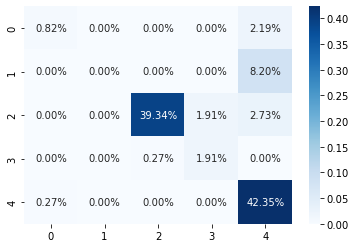

In [97]:
sns.heatmap(cf/np.sum(cf), annot=True, fmt='.2%', cmap='Blues')

In [69]:
accuracy = accuracy_score(y_test['weather_values'],y_test['Predicted'])
accuracy = np.round(accuracy,2)
print('The accuracy of the model is: ',accuracy)

The accuracy of the model is:  0.84


In [70]:
print(classification_report(y_test['weather_values'],y_test['Predicted']))

              precision    recall  f1-score   support

           0       0.75      0.27      0.40        11
           1       0.00      0.00      0.00        30
           2       0.99      0.89      0.94       161
           3       0.50      0.88      0.64         8
           4       0.76      0.99      0.86       156

    accuracy                           0.84       366
   macro avg       0.60      0.61      0.57       366
weighted avg       0.80      0.84      0.81       366



C:\Users\Varnika Mulay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='best')
X
regressor.fit(X,Y) #training of classifier
X_in=np.array([2,0,1,1,2,0,1]) #age= 30-40   income=low student-no   credit_rating=excellent
y_pred=regressor.predict([X_in])
print("Prediction: ",y_pred)

Prediction:  [2]


In [92]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

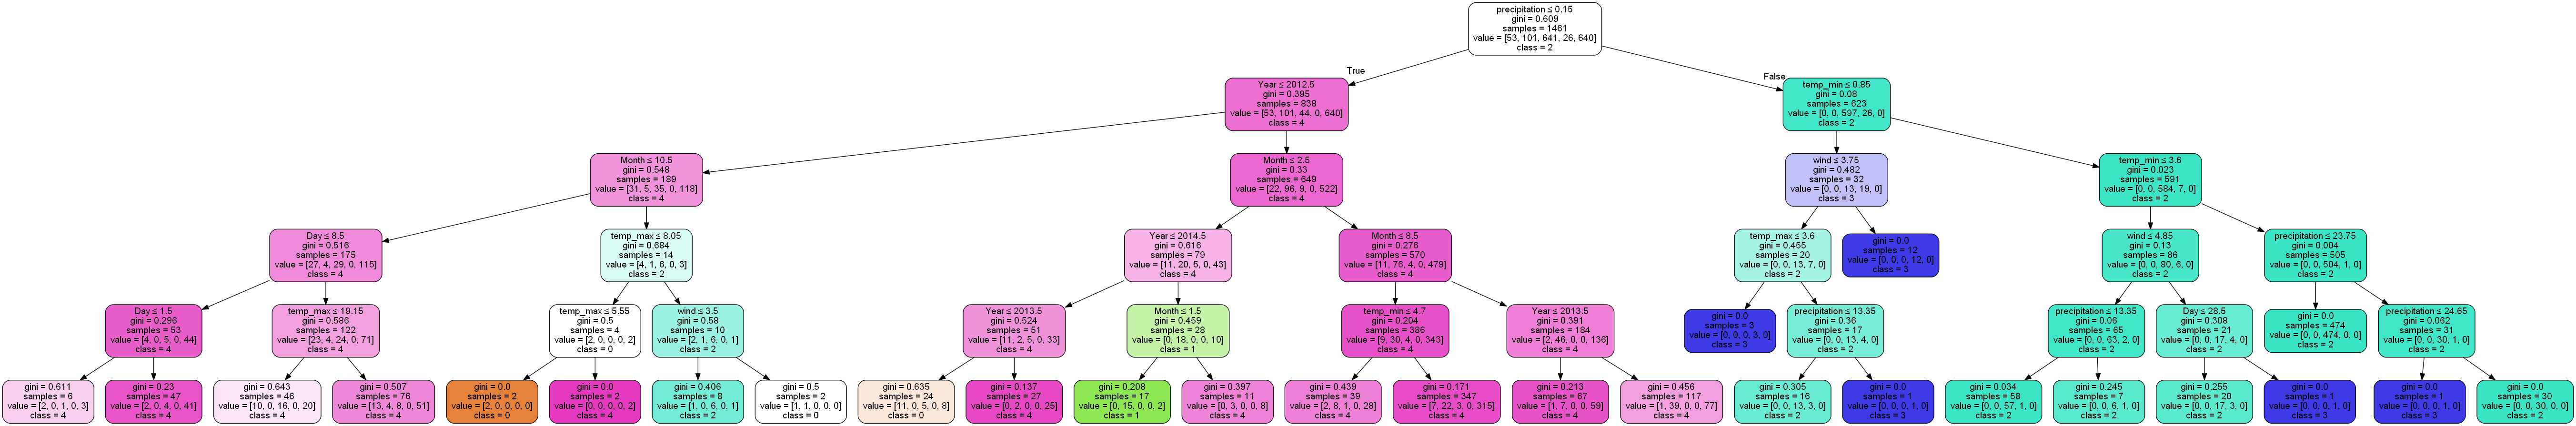

In [109]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
feature_cols=['precipitation','temp_max','temp_min','wind', 'Year', 'Month', 'Day']
export_graphviz(regressor,out_file=dot_data, filled=True,rounded=True,special_characters=True,
                feature_names = feature_cols, class_names=['0','1', '2', '3', '4'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())